In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("bet_each_round_march_randomness.csv")
df = df.loc[:,"rank":]
df

,rank,team_name,final_StatCoin_balance,bet_each_round,edu_level,competitor_type,day_1_guess,day_1_bet,day_1_total,day_2_guess,...,day_13_total,day_14_guess,day_14_bet,day_14_total,day_15_guess,day_15_bet,day_15_total,day_16_guess,day_16_bet,day_16_total
0,1,A Fraction Ahead,9000,yes,Pre-College,Team,Yes,300.0,3700.0,No,...,7300.0,Yes,1500.0,8800.0,No,100.0,8900.0,Yes,100.0,9000.0
1,2,Elidia R,8900,yes,Pre-College,Individual,Yes,1500.0,4000.0,No,...,6500.0,Yes,800.0,7300.0,No,800.0,8100.0,Yes,800.0,8900.0
2,3,Mathster's Stupefying 1 Stars,8400,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,7100.0,No,300.0,6800.0,No,800.0,7600.0,Yes,800.0,8400.0
3,4,Dylan M,8000,yes,Pre-College,Individual,Yes,800.0,3200.0,No,...,5600.0,Yes,800.0,6400.0,No,800.0,7200.0,Yes,800.0,8000.0
4,4,J Fly Money,8000,yes,Pre-College,Individual,Yes,800.0,3200.0,No,...,7200.0,No,800.0,6400.0,No,800.0,7200.0,Yes,800.0,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,3 StDev Above Mu,2000,yes,Pre-College,Team,Yes,300.0,3700.0,No,...,1200.0,No,800.0,400.0,No,800.0,1200.0,Yes,800.0,2000.0
86,87,The Fluffy-Floofy Bears,1800,yes,College,Individual,Yes,1500.0,4000.0,No,...,2600.0,No,800.0,1800.0,No,800.0,2600.0,No,800.0,1800.0
87,88,The Gram,1600,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,2400.0,Yes,800.0,3200.0,Yes,800.0,2400.0,No,800.0,1600.0
88,89,silly snakes,1400,yes,Pre-College,Team,Yes,800.0,3200.0,No,...,1700.0,No,300.0,1400.0,No,800.0,2200.0,No,800.0,1400.0


In [5]:
total_bets = df["day_1_bet"]
for day in range(2,17):
    total_bets += df["day_" + str(day) + "_bet"]

In [6]:
fig_3_df = pd.DataFrame({"final_StatCoin_balance": df["final_StatCoin_balance"],
                         "edu_level": df["edu_level"],
                         "competitor_type": df["competitor_type"],
                         "edu_level_competitor_type": df["edu_level"] + df["competitor_type"],
                         "average_StatCoin_bet": total_bets/16})
fig_3_df[70:90]

,final_StatCoin_balance,edu_level,competitor_type,edu_level_competitor_type,average_StatCoin_bet
70,3700,Pre-College,Individual,Pre-CollegeIndividual,643.75
71,3700,College,Individual,CollegeIndividual,500.00
72,3700,Pre-College,Individual,Pre-CollegeIndividual,681.25
73,3700,Pre-College,Team,Pre-CollegeTeam,518.75
74,3600,Pre-College,Team,Pre-CollegeTeam,637.50
75,3200,Pre-College,Team,Pre-CollegeTeam,231.25
76,3200,Pre-College,Team,Pre-CollegeTeam,531.25
77,3200,Pre-College,Team,Pre-CollegeTeam,843.75
78,3100,Pre-College,Individual,Pre-CollegeIndividual,843.75
79,2800,Pre-College,Team,Pre-CollegeTeam,281.25


<AxesSubplot:xlabel='average_StatCoin_bet', ylabel='final_StatCoin_balance'>

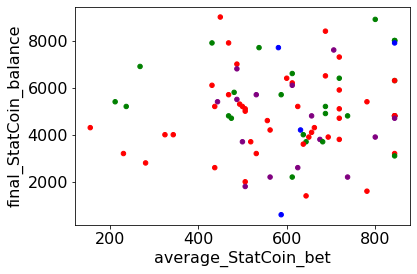

In [7]:
# many thanks to this website:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
colors = {'Pre-CollegeTeam':'red',
          'Pre-CollegeIndividual':'green',
          'CollegeTeam':'blue',
          'CollegeIndividual':'purple'}

fig_3_df.plot.scatter(x="average_StatCoin_bet",
                      y="final_StatCoin_balance",
                      c=fig_3_df["edu_level_competitor_type"].map(colors))

In [8]:
# copied from lecture on Pipelines
model = Pipeline([
    ("oh and poly", make_column_transformer((OneHotEncoder(), ["edu_level_competitor_type"]), 
                                     (PolynomialFeatures(degree=3, include_bias=False), ["average_StatCoin_bet"]))),
    ("lr", LinearRegression())
])

In [9]:
model.fit(fig_3_df[["edu_level_competitor_type", "average_StatCoin_bet"]], fig_3_df["final_StatCoin_balance"])
model.score(fig_3_df[["edu_level_competitor_type", "average_StatCoin_bet"]], fig_3_df["final_StatCoin_balance"])

0.1002922461650585

In [10]:
# figure 3 insights
fig_3_prediction_df = fig_3_df[["edu_level_competitor_type", "average_StatCoin_bet"]].copy()
fig_3_prediction_df

,edu_level_competitor_type,average_StatCoin_bet
0,Pre-CollegeTeam,450.00
1,Pre-CollegeIndividual,800.00
2,Pre-CollegeTeam,687.50
3,Pre-CollegeIndividual,843.75
4,Pre-CollegeIndividual,843.75
...,...,...
85,Pre-CollegeTeam,506.25
86,CollegeIndividual,506.25
87,Pre-CollegeTeam,781.25
88,Pre-CollegeTeam,643.75


In [11]:
fig_3_prediction_df["prediction"] = model.predict(fig_3_prediction_df)
fig_3_prediction_df

,edu_level_competitor_type,average_StatCoin_bet,prediction
0,Pre-CollegeTeam,450.00,5059.564319
1,Pre-CollegeIndividual,800.00,5822.698824
2,Pre-CollegeTeam,687.50,4536.697965
3,Pre-CollegeIndividual,843.75,6249.765410
4,Pre-CollegeIndividual,843.75,6249.765410
...,...,...,...
85,Pre-CollegeTeam,506.25,4907.517680
86,CollegeIndividual,506.25,4517.067592
87,Pre-CollegeTeam,781.25,4845.286549
88,Pre-CollegeTeam,643.75,4551.004489


In [12]:
demographics = ["Pre-CollegeIndividual", "CollegeTeam", "Pre-CollegeTeam", "CollegeIndividual"]

In [13]:
def plot_demographics(demographic_name, ax=None):
    df = pd.DataFrame({
        "edu_level_competitor_type": demographic_name,
        "average_StatCoin_bet": np.arange(100, 844, 1),
    })
    df["predicted_outcome"] = model.predict(df)
    ax = df.plot.line(x="average_StatCoin_bet", y="predicted_outcome",
                      label=demographic_name, ax=ax)
    return ax

In [14]:
colors = {'Pre-CollegeTeam':'green',
          'Pre-CollegeIndividual':'blue',
          'CollegeTeam':'orange',
          'CollegeIndividual':'red'}

In [15]:
fig, ax = plt.subplots(figsize=(9, 7))

for demo in demographics:
    plot_demographics(demo, ax=ax)


fig_3_df.plot.scatter(x="average_StatCoin_bet",
                      y="final_StatCoin_balance",
                      c=fig_3_df["edu_level_competitor_type"].map(colors),
                     ax=ax)

ax.legend(loc='upper left', fontsize='small')

ax.set_ylabel("Final StatCoin Amount")
ax.set_xlabel("Average StatCoin Bet")

ax.set_title("Figure 3: Cubic Linear Regression", pad=20)

fig = ax.get_figure()

fig.savefig("figure_3.png", dpi=300, bbox_inches="tight")
plt.close()